# Part 1 - Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
x = 6 * np.random.rand(200, 1) -3
y = 0.8 * x**2 + 0.9 * x + 2 + np.random.randn(200,1)

In [3]:
y

array([[ 5.44690663],
       [ 7.78394035],
       [ 4.2737354 ],
       [ 1.46131384],
       [ 6.97961415],
       [ 3.37394511],
       [ 1.09402189],
       [ 7.11307516],
       [ 4.79310529],
       [ 2.47837776],
       [ 4.90828082],
       [ 5.63051167],
       [ 0.46642711],
       [ 1.9851869 ],
       [ 3.37367388],
       [ 5.38975156],
       [ 5.23027757],
       [ 3.0825539 ],
       [ 2.03948375],
       [ 2.98386182],
       [ 2.25323899],
       [11.9478876 ],
       [ 2.10916721],
       [ 2.16184692],
       [ 9.36295715],
       [ 2.17626897],
       [ 4.62123612],
       [ 6.49223565],
       [ 1.61790366],
       [ 4.0051064 ],
       [ 9.93204104],
       [ 2.77528219],
       [ 5.83426529],
       [ 3.96016736],
       [ 3.92232677],
       [ 5.50537879],
       [ 6.49704165],
       [ 2.52045402],
       [ 3.22350051],
       [ 0.90685617],
       [ 2.18522526],
       [ 6.8700713 ],
       [ 5.70269759],
       [ 6.37937209],
       [ 2.55155187],
       [ 5

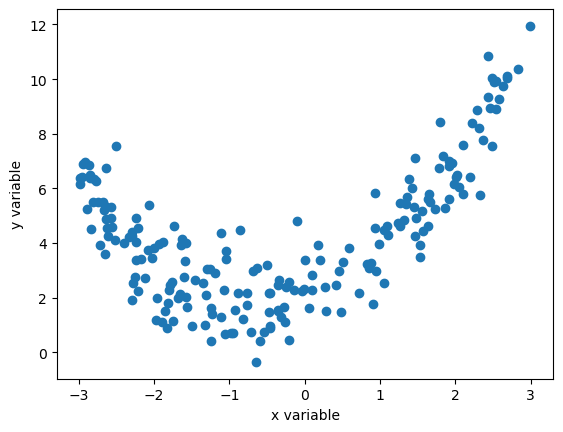

In [4]:
plt.scatter(x=x, y=y)
plt.xlabel("x variable")
plt.ylabel("y variable")
plt.show()

In [5]:
# split the data into training and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [6]:
# apply linear regression model
linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [7]:
# predict 
y_pred_train = linear.predict(x_train)
y_pred_test = linear.predict(x_test)

In [8]:
# evaluate the model 

print(r2_score(y_train, y_pred_train))
print()
print(r2_score(y_test, y_pred_test))

0.23946056131127968

0.06251300270334381


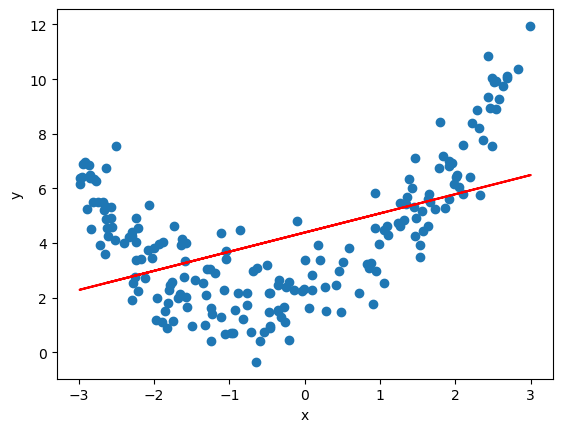

In [9]:
plt.scatter(x=x, y=y)
plt.plot(x_train, y_pred_train, color='r')
#plt.plot(x_test, y_pred_test, color='g')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Applying Polynomial Linear Regression method with degree =2

In [10]:
poly = PolynomialFeatures(degree = 2, include_bias = True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)

In [11]:
# build linear regression

linear_1 = LinearRegression()
linear_1.fit(x_train_trans, y_train)

LinearRegression()

In [12]:
# predict
y_pred_train_ply = linear_1.predict(x_train_trans)
y_pred_test_ply = linear_1.predict(x_test_trans)

In [13]:
# Evaluate the model
print(r2_score(y_train, y_pred_train_ply))
print()
print(r2_score(y_test, y_pred_test_ply))

0.814353668974864

0.8733012072157171


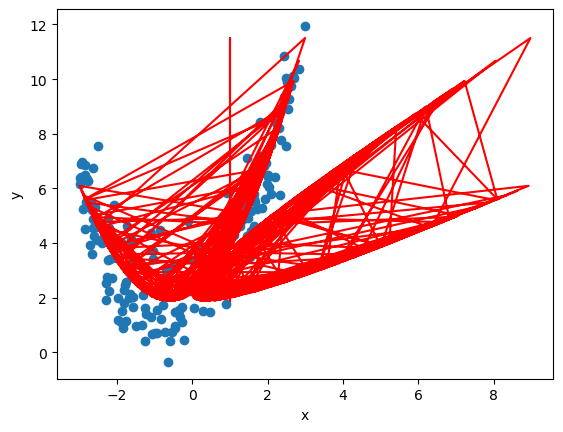

In [14]:
plt.scatter(x=x, y=y)
plt.plot(x_train_trans, y_pred_train_ply, color='r')
#plt.plot(x_test, y_pred_test, color='g')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Case 2 : Regularization Approach 

In [28]:
mpg_df = pd.read_csv("Dataset/mpg.csv")
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [29]:
mpg_df['origin'].value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

In [30]:
mpg_df['origin'] = mpg_df['origin'].replace({1:'america', 2:'europe', 3:'asia'})
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,america,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,america,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,america,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,america,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,america,ford torino


In [31]:
mpg_df = pd.get_dummies(mpg_df, columns=['origin'])

In [32]:
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,True,False,False
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,True,False,False
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,True,False,False
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,True,False,False
4,17.0,8,302.0,140,3449,10.5,70,ford torino,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,ford mustang gl,True,False,False
394,44.0,4,97.0,52,2130,24.6,82,vw pickup,False,False,True
395,32.0,4,135.0,84,2295,11.6,82,dodge rampage,True,False,False
396,28.0,4,120.0,79,2625,18.6,82,ford ranger,True,False,False


In [33]:
mpg_df['name'].nunique()

305

In [34]:
mpg_df['name'].value_counts()

name
ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: count, Length: 305, dtype: int64

In [35]:
mpg_df = mpg_df.drop(['name','origin_america'], axis=1)

In [36]:
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,False,False
1,15.0,8,350.0,165,3693,11.5,70,False,False
2,18.0,8,318.0,150,3436,11.0,70,False,False
3,16.0,8,304.0,150,3433,12.0,70,False,False
4,17.0,8,302.0,140,3449,10.5,70,False,False


In [37]:
mpg_df.isnull().sum()

mpg              0
cylinders        0
displacement     0
horsepower       0
weight           0
acceleration     0
model_year       0
origin_asia      0
origin_europe    0
dtype: int64

In [38]:
# To find the unique value in each variable
for i in mpg_df.columns:
    print("***********************************************************", i,
         "******************************************************************")
    print()
    print(set(mpg_df[i].tolist()))
    print()

*********************************************************** mpg ******************************************************************

{9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.5, 27.5, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 29.5, 35.0, 31.5, 36.0, 33.5, 36.1, 39.4, 43.1, 35.7, 37.3, 41.5, 38.1, 46.6, 40.8, 44.3, 43.4, 44.6, 44.0, 14.5, 15.5, 16.5, 16.9, 17.5, 17.6, 18.5, 18.6, 18.1, 19.9, 19.4, 19.1, 20.5, 20.6, 21.5, 21.1, 21.6, 22.5, 22.4, 23.9, 23.6, 23.5, 24.5, 25.4, 25.1, 25.5, 26.4, 26.6, 27.4, 27.9, 28.4, 28.1, 29.9, 30.5, 30.9, 31.9, 31.6, 32.8, 32.1, 32.2, 32.7, 32.4, 33.8, 32.3, 33.7, 32.9, 34.1, 34.2, 34.5, 34.3, 34.7, 35.1, 34.4, 34.0, 36.4, 37.2, 37.0, 37.7, 38.0, 39.1, 39.0, 40.9, 16.2, 17.7, 18.2, 19.2, 19.8, 20.2, 20.8, 20.3, 22.3, 23.2, 23.8, 23.7, 24.3, 24.2, 25.8, 26.8, 27.2, 28.8, 29.8, 30.7, 31.8, 31.3}

*********************************************************** cylinders ***********************

In [39]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            398 non-null    float64
 1   cylinders      398 non-null    int64  
 2   displacement   398 non-null    float64
 3   horsepower     398 non-null    object 
 4   weight         398 non-null    int64  
 5   acceleration   398 non-null    float64
 6   model_year     398 non-null    int64  
 7   origin_asia    398 non-null    bool   
 8   origin_europe  398 non-null    bool   
dtypes: bool(2), float64(3), int64(3), object(1)
memory usage: 22.7+ KB


In [40]:
mpg_df = mpg_df.replace('?', np.nan)

In [41]:
mpg_df['horsepower'] = pd.to_numeric(mpg_df['horsepower'])

In [42]:
mpg_df.isnull().sum()

mpg              0
cylinders        0
displacement     0
horsepower       6
weight           0
acceleration     0
model_year       0
origin_asia      0
origin_europe    0
dtype: int64

<AxesSubplot:ylabel='horsepower'>

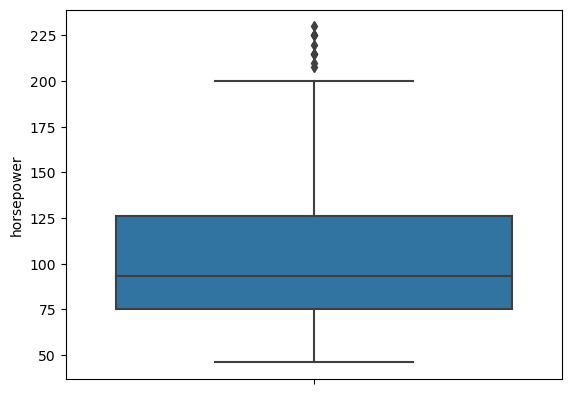

In [43]:
sns.boxplot(y=mpg_df['horsepower'], data=mpg_df)

In [44]:
mpg_df['horsepower'] = mpg_df['horsepower'].fillna(mpg_df['horsepower'].median())

In [45]:
# split the data into x and y
x = mpg_df.drop('mpg', axis=1)
y = mpg_df[['mpg']]

In [46]:
x.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_asia,origin_europe
0,8,307.0,130.0,3504,12.0,70,False,False
1,8,350.0,165.0,3693,11.5,70,False,False
2,8,318.0,150.0,3436,11.0,70,False,False
3,8,304.0,150.0,3433,12.0,70,False,False
4,8,302.0,140.0,3449,10.5,70,False,False


In [47]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [48]:
# Feature scaling required
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler = pd.DataFrame(x_scaler, columns=x.columns)
x_scaler.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_asia,origin_europe
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.497643,-0.461968
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-0.497643,-0.461968
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.497643,-0.461968
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.497643,-0.461968
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.497643,-0.461968


In [49]:
# split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.30, random_state=2)

In [50]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(278, 8) (120, 8) (278, 1) (120, 1)


# Fit the Linear Regression model 

In [51]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

for idx, col_name in enumerate(x_train.columns):
    print("The co-efficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The co-efficient for cylinders is -0.9070337484280226
The co-efficient for displacement is 2.8093746037252916
The co-efficient for horsepower is -0.6310008171483824
The co-efficient for weight is -5.869498769577224
The co-efficient for acceleration is 0.19953881477287608
The co-efficient for model_year is 2.8763341997030034
The co-efficient for origin_asia is 1.0699595176109478
The co-efficient for origin_europe is 1.479456843161369


In [52]:
regression_model.coef_

array([[-0.90703375,  2.8093746 , -0.63100082, -5.86949877,  0.19953881,
         2.8763342 ,  1.06995952,  1.47945684]])

In [53]:
regression_model.intercept_

array([23.53527787])

# Part 1 - Regularization : LASSO Model and note the co-efficient value

In [54]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
# alpha means lambda value and it's penalty
lasso.fit(x_train, y_train)
print("Lasso Co-efficient :", lasso.coef_)

Lasso Co-efficient : [-0.          0.         -0.23779705 -4.70482266  0.          2.70335612
  0.71644501  1.08215523]


# Part 2 - Regularization : Ridge Model and note the co-efficient value

In [55]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.3)
ridge.fit(x_train, y_train)
print("Ridge Co-efficient :", ridge.coef_)

Ridge Co-efficient : [[-0.86968281  2.661581   -0.64376112 -5.76674602  0.18155086  2.86564525
   1.06178628  1.46541994]]


# Part 3 - Regularization : ElasticNet and note the coefficient values

In [58]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha = 0.1 ,l1_ratio = 0.3)
elastic.fit(x_train , y_train)

ElasticNet(alpha=0.1, l1_ratio=0.3)

In [59]:
print('ElasticNet co-efficient :' , elastic.coef_)

ElasticNet co-efficient : [-0.5899799  -0.12773382 -0.94170176 -3.3276656  -0.059672    2.47515177
  0.87742081  1.05305582]


In [57]:
regression_model.coef_

array([[-0.90703375,  2.8093746 , -0.63100082, -5.86949877,  0.19953881,
         2.8763342 ,  1.06995952,  1.47945684]])

# Compare accuracy

In [60]:
y_pred_train_lr = regression_model.predict(x_train)
y_pred_test_lr = regression_model.predict(x_test)

y_pred_train_lasso = lasso.predict(x_train)
y_pred_test_lasso = lasso.predict(x_test)

y_pred_train_ridge = ridge.predict(x_train)
y_pred_test_ridge = ridge.predict(x_test)

y_pred_train_elastic = elastic.predict(x_train)
y_pred_test_elastic = elastic.predict(x_test)

In [63]:
print("Linear Trainging :", r2_score(y_train, y_pred_train_lr))
print()
print("Linear Test :", r2_score(y_test, y_pred_test_lr))

print()

print("Lasso Trainging :", r2_score(y_train, y_pred_train_lasso))
print()
print("Lasso Test :", r2_score(y_test, y_pred_test_lasso))

print()

print("Ridge Trainging :", r2_score(y_train, y_pred_train_ridge))
print()
print("Ridge Test :", r2_score(y_test, y_pred_test_ridge))

print()

print("ElasticNet Trainging :", r2_score(y_train, y_pred_train_elastic))
print()
print("ElasticNet Test :", r2_score(y_test, y_pred_test_elastic))

Linear Trainging : 0.8195425758249515

Linear Test : 0.8254870925859883

Lasso Trainging : 0.8137466469355601

Lasso Test : 0.8231957656158253

Ridge Trainging : 0.8195237723730078

Ridge Test : 0.8256582638340384

ElasticNet Trainging : 0.8084617925006163

ElasticNet Test : 0.8137997205394054
